In [1]:
# Assignment 5
# Author: David Bui
# DSC-540
# Date: 12/06/2021
# Description: In this assignment we are implementing a decision tree with data that contains uncertainty. A fuzzy decision tree
# is used to provide an improved method while still using logic. 

import pandas as pd
import numpy as np

# Creating a dataframe to hold list arrays.
x1 = ["hot","hot","hot","mild","cool","cool","cool","mild","cool","mild","mild","mild","hot","mild"]
x2 = ["weak","strong","weak","weak","weak","strong","strong","weak","weak","weak","strong","strong","weak","strong"]
x3 = ["long","long","long","long","short","short","short","long","short","short","short","long","short","long"]
y1= ["no","no","yes","yes","yes","no","yes","no","yes","yes","yes","yes","yes","no"]

df = pd.DataFrame([y1,x1,x2,x3]).T #Transposing the matrix of lists
df.columns = ['Drive Car','Temperature', 'Wind','Traffic-Jam'] # adding column labels
df.head()

,Drive Car,Temperature,Wind,Traffic-Jam
0,no,hot,weak,long
1,no,hot,strong,long
2,yes,hot,weak,long
3,yes,mild,weak,long
4,yes,cool,weak,short


In [2]:
# Transforming data into nominal form.
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

le= LabelEncoder() # Used to transform categorical data into numeric.

df['Drive Car']=le.fit_transform(df['Drive Car'])
df['Temperature']=le.fit_transform(df['Temperature'])
df['Wind']=le.fit_transform(df['Wind'])
df['Traffic-Jam']=le.fit_transform(df['Traffic-Jam'])
df['Drive Car']=le.fit_transform(df['Drive Car'])

X = df.iloc[:,1:4]
y = df.iloc[:,0]

dt = DecisionTreeClassifier(max_depth = 3, random_state = 0) # max_depth can be used to grow the decision tree.
dt.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [3]:
# a. Calculate the information gain for x1, x2, and x3.
def entropy(input):
   elements,counts = np.unique(input,return_counts = True)
   entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
   return entropy

def IG(df,feature,target):
   totalEntropy = entropy(df[target])
   vals,counts= np.unique(df[feature],return_counts=True)
   WeightedEntropy = np.sum([(counts[i]/np.sum(counts))*entropy(df.where(df[feature]==vals[i]).dropna()[target]) for i in range(len(vals))])
   Information_Gain = totalEntropy - WeightedEntropy
   return Information_Gain

print("Temperature Information Gain: ",IG(df,'Temperature','Drive Car'))
print("Wind Information Gain:        ",IG(df,'Wind','Drive Car'))
print("Traffic-Jam Information Gain: ",IG(df,'Traffic-Jam','Drive Car'))

# b. Choose the root node for the decision tree.
print("Traffic-Jam has the highest Information Gain which makes it our ROOT NODE.")

Temperature Information Gain:  0.02922256565895487
Wind Information Gain:         0.04812703040826949
Traffic-Jam Information Gain:  0.15183550136234159
Traffic-Jam has the highest Information Gain which makes it our ROOT NODE.


[Text(715.3846153846154, 1057.0, 'Traffic <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]\nclass = no'),
 Text(381.53846153846155, 755.0, 'Wind <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]\nclass = yes'),
 Text(190.76923076923077, 453.0, 'Temperature <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = yes'),
 Text(95.38461538461539, 151.0, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = yes'),
 Text(286.1538461538462, 151.0, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = yes'),
 Text(572.3076923076924, 453.0, 'Temperature <= 1.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]\nclass = yes'),
 Text(476.9230769230769, 151.0, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = yes'),
 Text(667.6923076923077, 151.0, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = yes'),
 Text(1049.2307692307693, 755.0, 'Wind <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]\nclass = no'),
 Text(953.8461538461538, 453.0, 'Temperature <= 1.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = no'

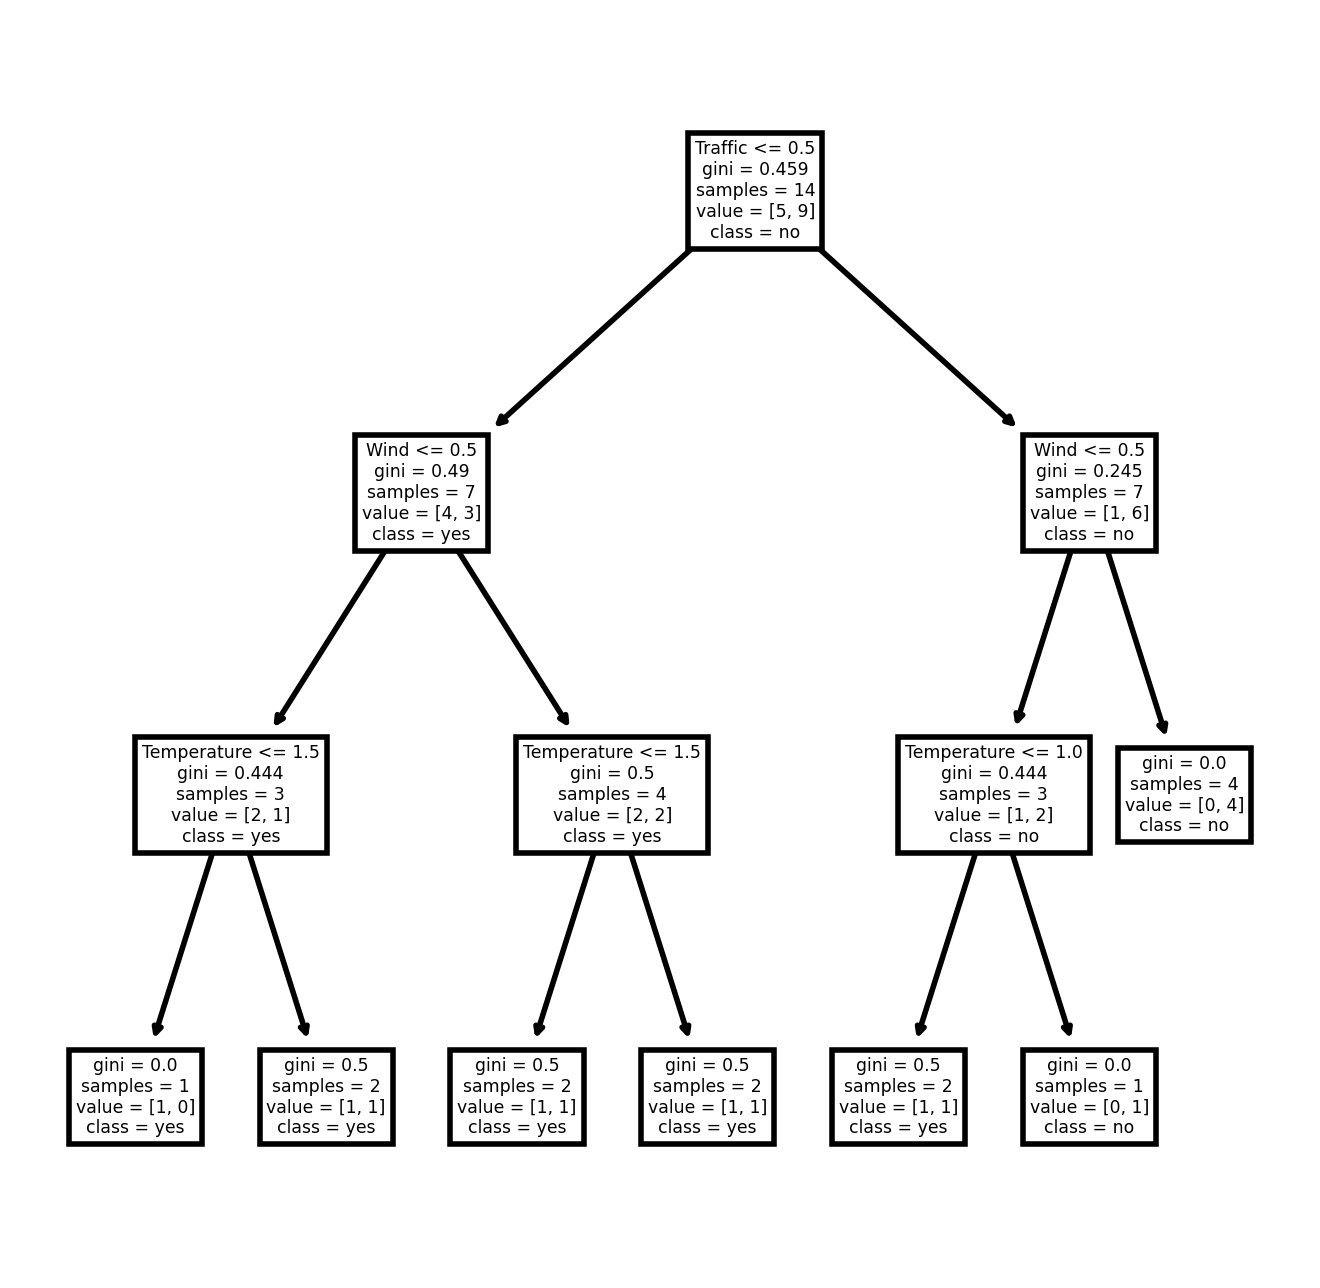

In [4]:
# c. Plot a partial decision tree from root node along with training examples sorted to each of its descendent nodes.
# Visualization of the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=400)
plot_tree(dt, feature_names = ['Temperature','Wind','Traffic'], class_names=['yes','no'])

In [5]:
# f. Summarize in a technical report
# Can be found in my GitHub: https://github.com/DouglasBui/GCU/tree/main/DSC-540/Assignment5

In [6]:
# Part 2------------------------------------------------------------------------------------
import skfuzzy as fuzz
from fuzzytree import FuzzyDecisionTreeClassifier

# defuzzification of changed attributes x1, x2, and x3
# First I must apply random elements to the terms of each feature.
import random as rn

# Temperature converted into degrees
x1f = df.Temperature
for i in range(len(x1f)):
    if x1f[i] == 1:
        x1f[i] = rn.randint(80,100)# hot
    elif x1f[i] == 2:
        x1f[i] = rn.randint(60,79)# mild
    elif x1f[i] == 0:
        x1f[i] = rn.randint(40,59)# cool

# Wind being converted into Wind mph
x2f = df.Wind
for i in range(len(x1f)):
    if x2f[i] == 1:
        x2f[i] = rn.randint(10,29)# Weak
    elif x2f[i] == 0:
        x2f[i] = rn.randint(30,45)# Strong
x1f = x1f.to_numpy()

# Traffic-Jam converted to Number of Traffic-Jams
x3f = df['Traffic-Jam']
for i in range(len(x1f)):
    if x3f[i] == 0:
        x3f[i] = rn.randint(10,20)# Long
    elif x3f[i] == 1:
        x3f[i] = rn.randint(0,9)# Short
        
data = {'Temperature':x1f,'Wind mph':x2f,'Traffic-Jams':x3f}
Xf = pd.DataFrame(data)
yf = df['Drive Car']

#Xf['Drive Car'] = yf
#x1f = x1f.to_numpy()

tempmf = fuzz.trapmf(x1f,[40,60,79,100])
windmf = fuzz.smf(x2f,10,30)
trafmf = fuzz.smf(x3f,0,10)

mfx =  np.column_stack((tempmf,windmf,trafmf))
print(mfx)

[[0.04761905 0.995      1.        ]
 [0.52380952 1.         1.        ]
 [0.66666667 0.955      1.        ]
 [1.         0.005      1.        ]
 [0.95       0.005      0.98      ]
 [0.55       1.         0.98      ]
 [0.         1.         0.        ]
 [1.         0.045      1.        ]
 [0.95       0.5        0.08      ]
 [1.         0.875      0.68      ]
 [1.         1.         0.98      ]
 [1.         1.         1.        ]
 [0.57142857 0.32       0.92      ]
 [1.         1.         1.        ]]


<ipython-input-6-4cbf8015c42e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1f[i] = rn.randint(80,100)# hot
<ipython-input-6-4cbf8015c42e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1f[i] = rn.randint(60,79)# mild
<ipython-input-6-4cbf8015c42e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1f[i] = rn.randint(40,59)# cool
<ipython-input-6-4cbf8015c42e>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [7]:
dfmf = pd.DataFrame(mfx,columns=['Temperature','Wind','Traffic-Jams'])
dfmf['Drive Car'] = df['Drive Car']
print("Temperature Information Gain: ",IG(dfmf,'Temperature','Drive Car'))
print("Wind Information Gain:        ",IG(dfmf,'Wind','Drive Car'))
print("Traffic-Jam Information Gain: ",IG(dfmf,'Traffic-Jams','Drive Car'))

# b. Choose the root node for the decision tree.
print("Temperature has the highest Information Gain which makes it our ROOT NODE.")

Temperature Information Gain:  0.5467306012187071
Wind Information Gain:         0.5117145300992025
Traffic-Jam Information Gain:  0.25089421192754335
Temperature has the highest Information Gain which makes it our ROOT NODE.


In [8]:
# Implemening Defuzzified input into Decision Tree Classifier.
clf_fuzz = DecisionTreeClassifier().fit(mfx,yf)
clf_sk = DecisionTreeClassifier().fit(Xf,yf)

# Evaluation: The FuzzyTree clearly shows an improvement over the initial decision tree. I ran this model dozens of times 
# and have received the exact same score each time. Showing the sklearn used to form our fuzzytree works perfectly while
# creating 0 variance.
print(f"DecisionTree: {dt.score(X,y)}")
print(f"   FuzzyTree: {clf_fuzz.score(mfx,yf)}")

DecisionTree: 0.7142857142857143
   FuzzyTree: 0.9285714285714286


[Text(450.90909090909093, 1107.3333333333333, 'Temperature <= 0.561\ngini = 0.459\nsamples = 14\nvalue = [5, 9]\nclass = no'),
 Text(225.45454545454547, 906.0, 'Temperature <= 0.024\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = yes'),
 Text(112.72727272727273, 704.6666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = no'),
 Text(338.1818181818182, 704.6666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = yes'),
 Text(676.3636363636364, 906.0, 'Traffic <= 0.99\ngini = 0.32\nsamples = 10\nvalue = [2, 8]\nclass = no'),
 Text(563.6363636363636, 704.6666666666666, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = no'),
 Text(789.0909090909091, 704.6666666666666, 'Wind <= 0.025\ngini = 0.48\nsamples = 5\nvalue = [2, 3]\nclass = no'),
 Text(676.3636363636364, 503.33333333333326, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = no'),
 Text(901.8181818181819, 503.33333333333326, 'Temperature <= 0.833\ngini = 0.5\nsamples = 4\nvalue = [2, 2]\nclass = yes'),
 Text(789

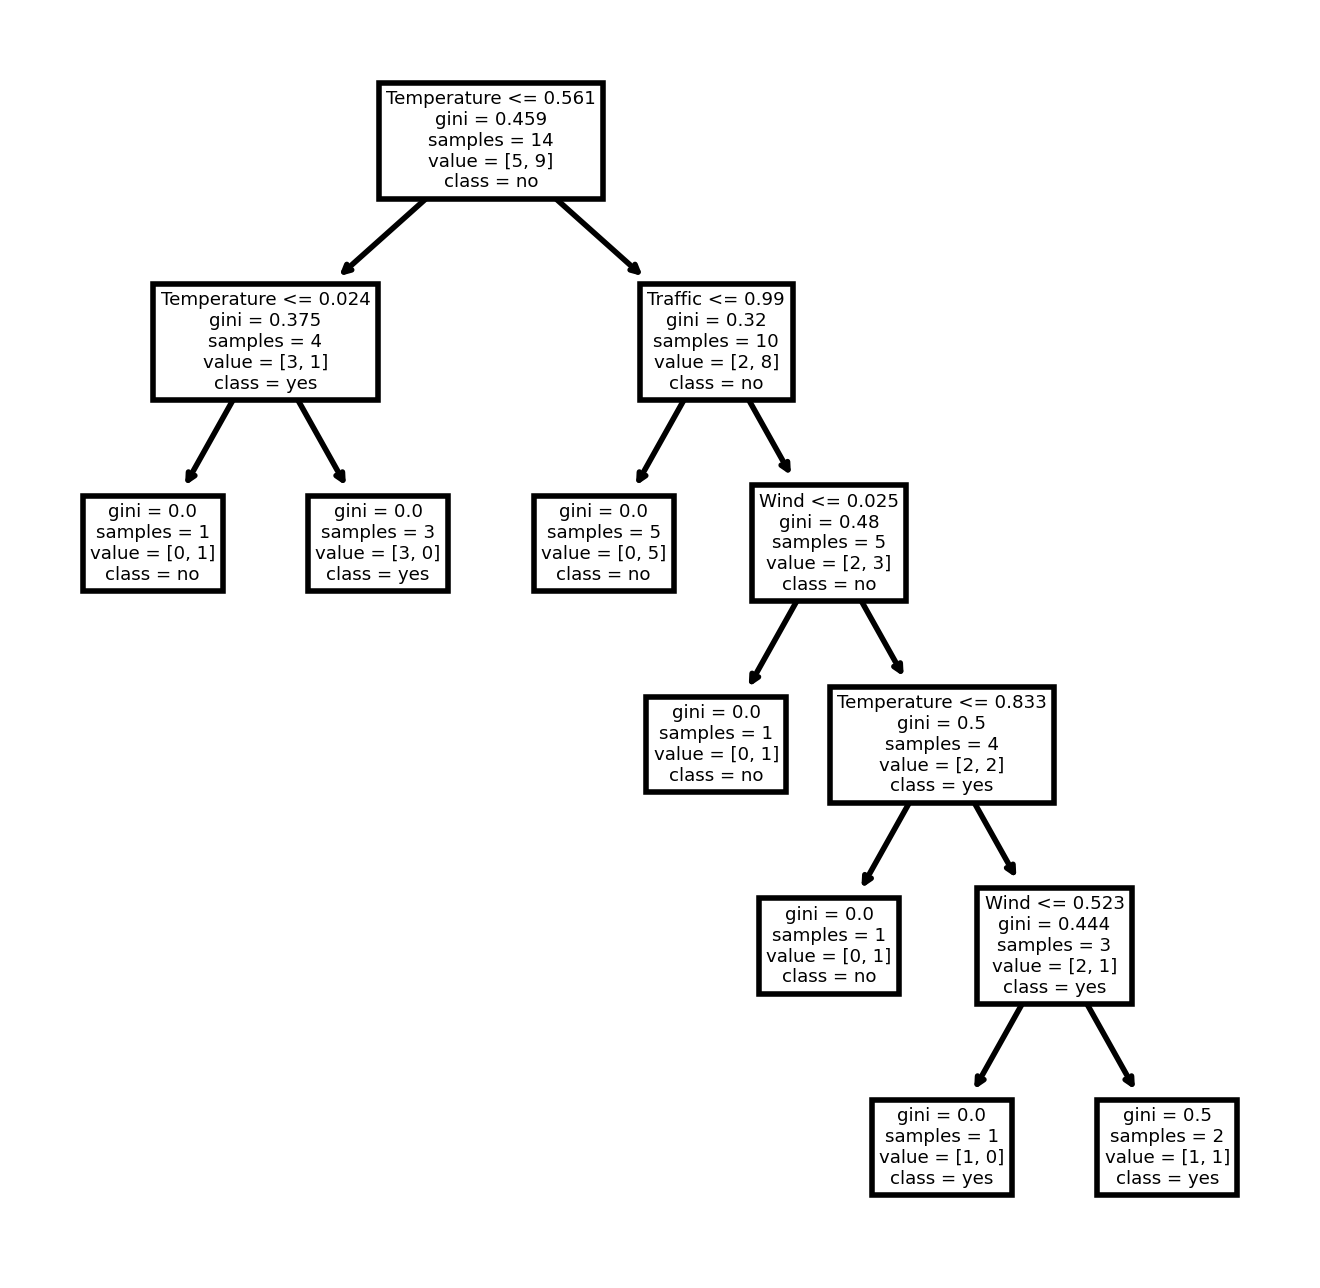

In [9]:
# Visualization of the unity progressing fuzzy tree. With each split the features grow closer to unity until purity
# or depth is reached.
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=400)
plot_tree(clf_fuzz, feature_names = ['Temperature','Wind','Traffic'], class_names=['yes','no'])

C:\Users\David\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


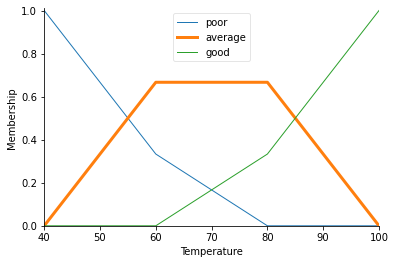

In [10]:
# This shows the visuzlization of a triangular fuzzy logic.
from skfuzzy import control as ctrl
temp = ctrl.Antecedent((40,60,80,100),'Temperature')
temp.automf(3)
temp['average'].view()

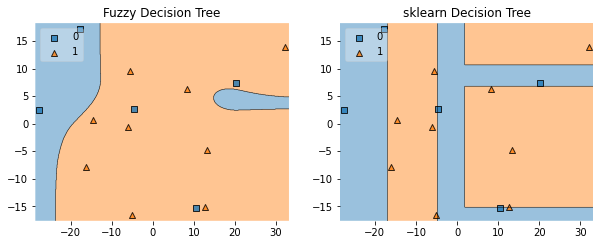

In [11]:
# Here we are making a comparison between a PCA decision tree and a fuzzytree with the embellished data.
# It would make sense that within this framework the decision tree would perform better since the embellish data allows for
# logical distinction. The purpose of this comparison is to show the process of fuzzification of a decision tree.
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.decomposition import PCA
data = {'Temperature':x1f,'Wind mph':x2f,' Traffic-Jams':x3f}
Xf2 = pd.DataFrame(data)
Xf2 = Xf2.to_numpy()
yf = df['Drive Car']
yf = yf.to_numpy()
pca = PCA(n_components = 2)
Xfp = pca.fit_transform(Xf2)
clf_sk = DecisionTreeClassifier().fit(Xfp,yf)
clf_fuzz = FuzzyDecisionTreeClassifier().fit(Xfp,yf)
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10,8))
labels = ['Fuzzy Decision Tree', 'sklearn Decision Tree']
for clf, lab, grd in zip([clf_fuzz, clf_sk], labels, [[0, 0], [0, 1]]):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(Xfp,yf, clf=clf, legend=2)
    plt.title("%s" % lab)
plt.show()